## Andmete analüüs
---

### Arendusvahendid
Käesolev töö kasutab andmete analüüsiks, arendamiseks, muundamiseks ning graafikute kuvamiseks objekt orienteeritud programmeerimiskeelt Python(python.org). Arendamisel kasutatakse peamiselt järgnevaid kooditeeke: _pandas_, _numpy_, _statsmodels_, _matplotlib_ jpt. 
Et analüüsitavast andmehulgast paremini aru saada, on mõistlik see esmalt välja kuvada. Näitame varianti andmete analüüsist ühe Saaremaal asuva korteri näol, mis on käesoleva töö üks katseobjekt ning kus elab sees neli pereliiget.

In [263]:
from matplotlib.pylab import rcParams
import matplotlib
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as pyplt
from math import ceil

matplotlib.style.use('ggplot')
%matplotlib inline
rcParams['figure.figsize'] = 14, 7

water_meter_data = [
    {'file_name': 'data/a.json', 'label': 'WMR - 35100025'},
    {'file_name': 'data/b.json', 'label': 'WMR - 3510003A'},
    {'file_name': 'data/c.json', 'label': 'WMR - 35100076'}
]

def print_dict(data_arr, elem='data', kind='line'):
    data_arr['data'][elem].plot(title=data_arr['label'], kind=kind)
    plt.show()


for wm in water_meter_data:
    data_df = pd.read_json(wm['file_name'], orient='records')
    wm['data'] = pd.DataFrame.from_records(data_df, index='date', columns=['data', 'date'])

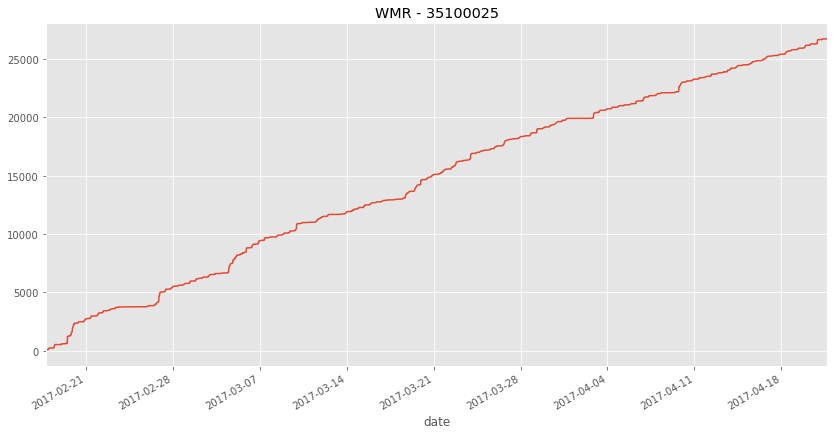

In [264]:
print_dict(water_meter_data[0], 'data')

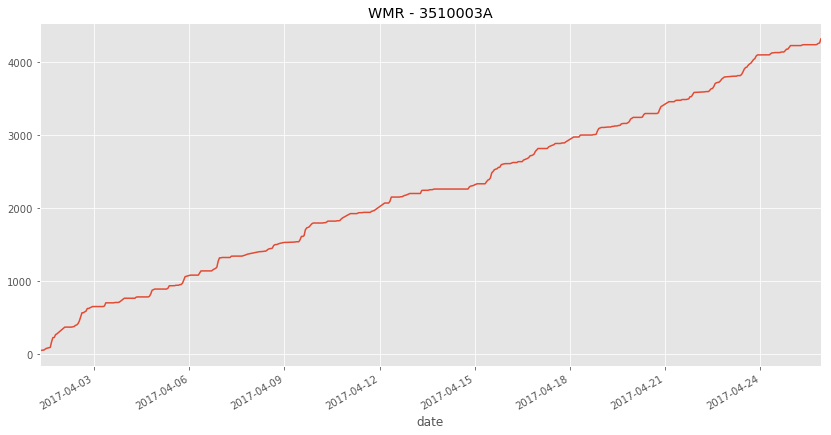

In [265]:
print_dict(water_meter_data[1], 'data')

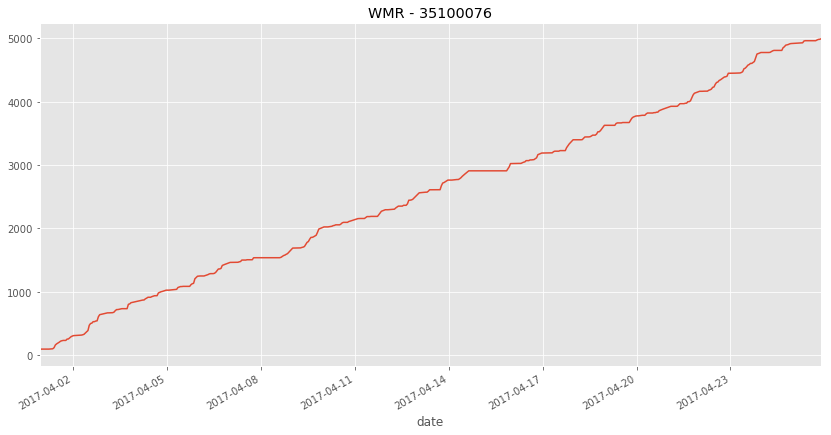

In [266]:
print_dict(water_meter_data[2], 'data')

In [267]:
for wm in water_meter_data:
    wm['data']['consumption'] = wm['data']['data'] - wm['data']['data'].shift()
    wm['data']['consumption'] = wm['data']['consumption'].fillna(0)

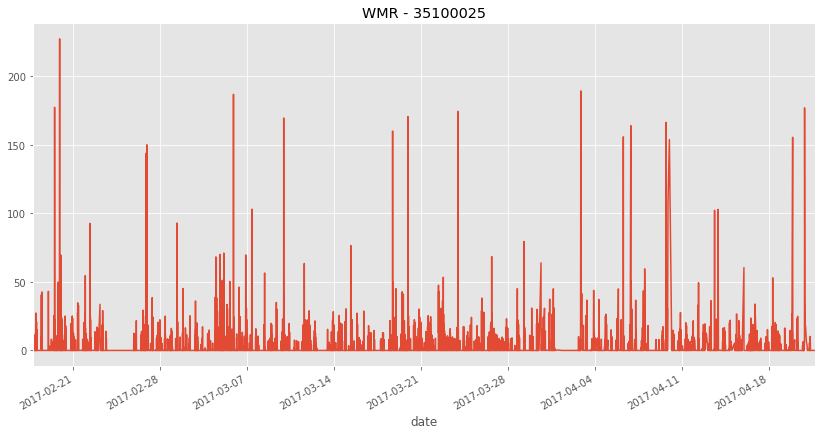

In [268]:
print_dict(water_meter_data[0], 'consumption')

In [269]:
for wm in water_meter_data:
    data = wm['data']
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['hour'] = data.index.hour
    data['minute'] = data.index.minute
    data['weekday_nb'] = data.index.dayofweek
    data['weekday'] = data.index.weekday_name
    wm['data'] = data

In [270]:
water_meter_data[0]['data'][:4]

,data,consumption,year,month,day,hour,minute,weekday_nb,weekday
date,,,,,,,,,
2017-02-17 18:41:09,17.92,0.00,2017,2,17,18,41,4,Friday
2017-02-17 18:46:11,23.48,5.56,2017,2,17,18,46,4,Friday
2017-02-17 18:51:13,23.48,0.00,2017,2,17,18,51,4,Friday
2017-02-17 18:56:15,23.48,0.00,2017,2,17,18,56,4,Friday


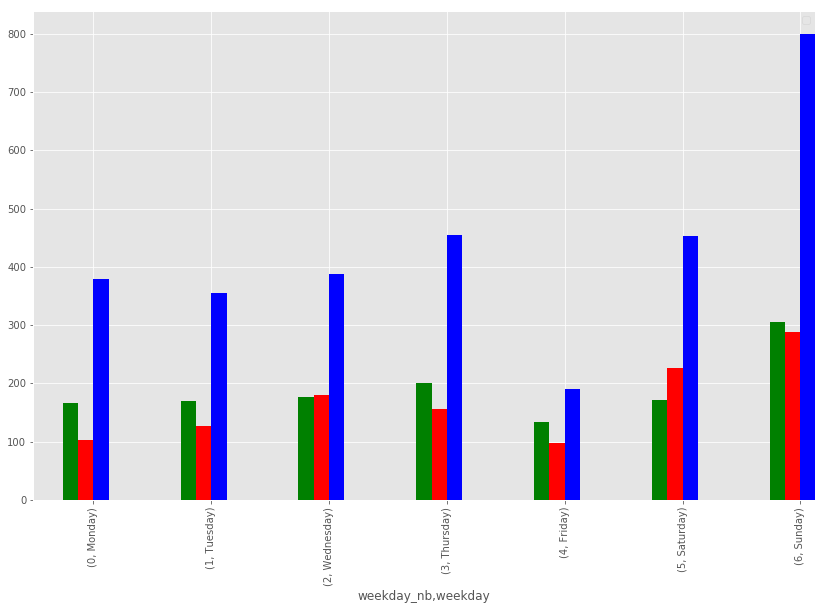

In [271]:
rcParams['figure.figsize'] = 14, 9
def plot_bar(label, kind='bar'):
    ax = water_meter_data[0][label].plot(kind=kind, color='blue', position=0, width=0.13)
    ax2 = water_meter_data[1][label].plot(ax=ax, kind=kind, color='red', position=1, width=0.13)
    water_meter_data[2][label].plot(ax=ax2, kind=kind, color='green', position=2, width=0.13)
    ax.legend(labels=map(lambda wm: wm['label'] , water_meter_data))
    
for wm in water_meter_data:
    df = wm['data']
    df_by_weekday = df.groupby(['month', 'day', 'weekday_nb', 'weekday'], as_index=False)
    df_by_weekday = df_by_weekday['consumption'].sum()    
    df_by_weekday = df_by_weekday[df_by_weekday['consumption'] > 1]
    df_by_weekday = df_by_weekday.groupby(['weekday_nb', 'weekday'])['consumption'].mean()
    wm['df_by_weekday'] = df_by_weekday
    
plot_bar('df_by_weekday')

In [497]:
for wm in water_meter_data:
    df = wm['data'].copy()
    df  = df[df['hour'] >= 9]
    df  = df[df['hour'] <= 22]
    by_day_no_one_home = df.groupby(['month', 'day', 'weekday'], as_index=False)
    by_day_no_one_home = by_day_no_one_home['consumption'].sum()    
    by_day_no_one_home = by_day_no_one_home[by_day_no_one_home['consumption'] <= 1]
    wm['by_day_no_one_home'] = by_day_no_one_home


In [498]:
water_meter_data[0]['by_day_no_one_home']

,month,day,weekday,consumption
7,2,24,Friday,0.76
43,4,1,Saturday,0.51
63,4,21,Friday,0.34


In [501]:
water_meter_data[1]['by_day_no_one_home']

,month,day,weekday,consumption


In [502]:
water_meter_data[2]['by_day_no_one_home']

,month,day,weekday,consumption
0,3,31,Friday,0.0


In [423]:
def plot_bar_single(wm, label, color, kind='bar'):
    ax = wm[label].plot(kind=kind, color=color, title=wm['label'])
    ax.legend(labels=[wm['label']])

def manage_hourly_data(result_label, map_df=lambda x: x):
    for wm in water_meter_data:
        df = wm['data']
        df = map_df(df)
        df_by_hour = df.groupby(['month', 'day', 'hour'], as_index=False)
        df_by_hour = df_by_hour['consumption'].sum()
        df_by_hour = df_by_hour.groupby(['hour'])['consumption'].mean()
        wm[result_label] = df_by_hour
    
manage_hourly_data('df_by_hour')

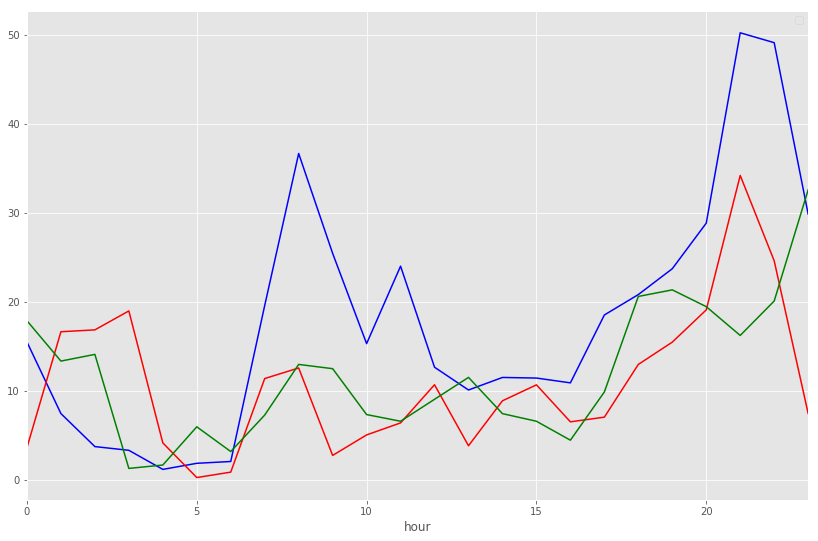

In [424]:
rcParams['figure.figsize'] = 14, 9
def plot_line(label, kind='line'):
    water_meter_data[0][label].plot(kind=kind, color='blue')
    water_meter_data[1][label].plot(kind=kind, color='red')
    water_meter_data[2][label].plot(kind=kind, color='green')
    plt.legend(labels=map(lambda wm: wm['label'] , water_meter_data))
plot_line('df_by_hour')

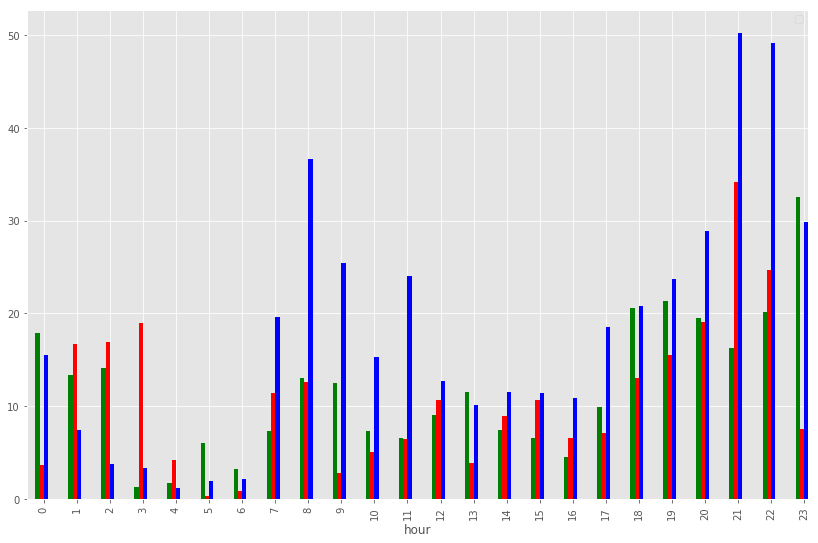

In [409]:
plot_bar('df_by_hour')

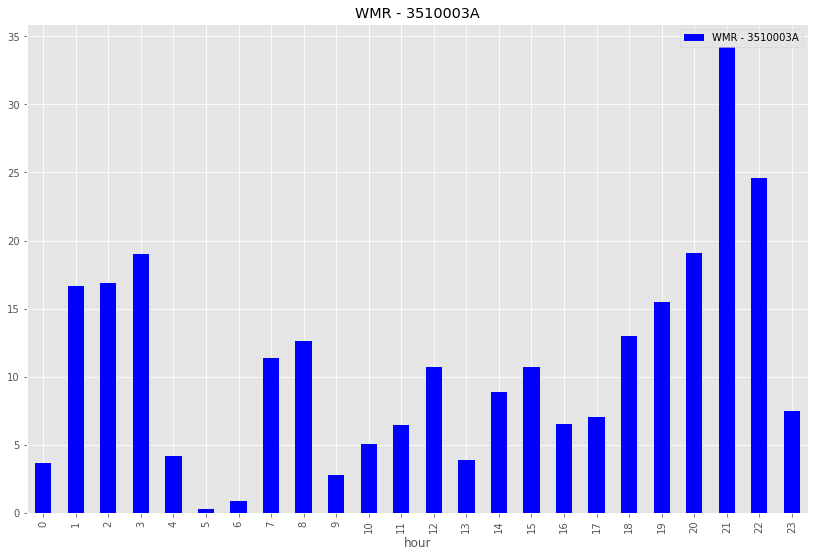

In [274]:
plot_bar_single(water_meter_data[1], 'df_by_hour', 'blue')

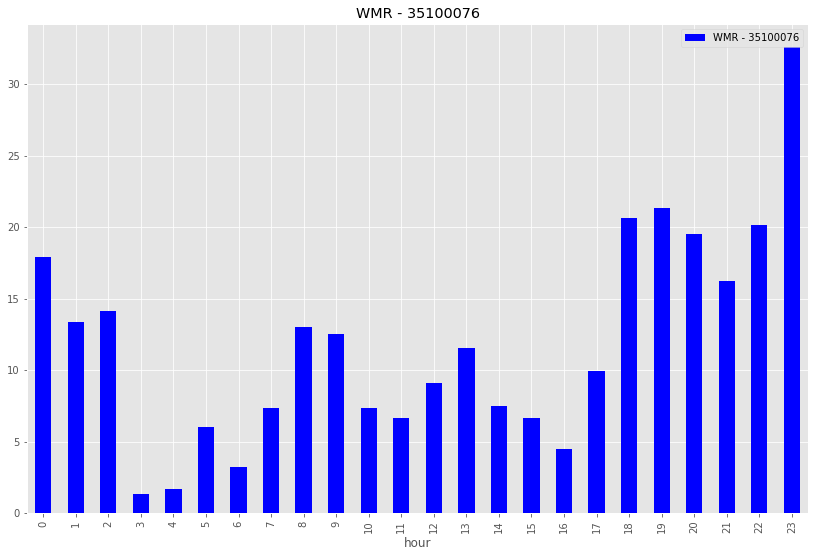

In [275]:
plot_bar_single(water_meter_data[2], 'df_by_hour', 'blue')

In [276]:
manage_hourly_data('df_by_hour_workdays', lambda df: df[df['weekday_nb'] < 5])

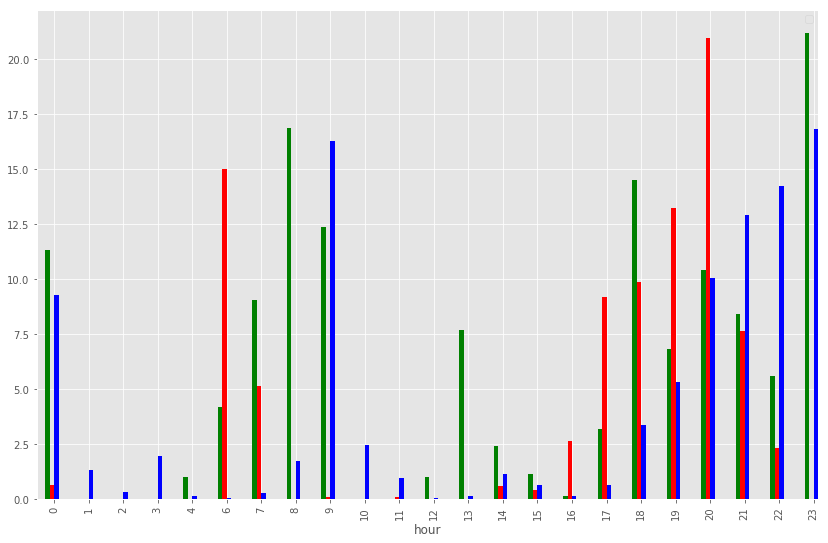

In [425]:
plot_bar('df_by_hour_workdays')

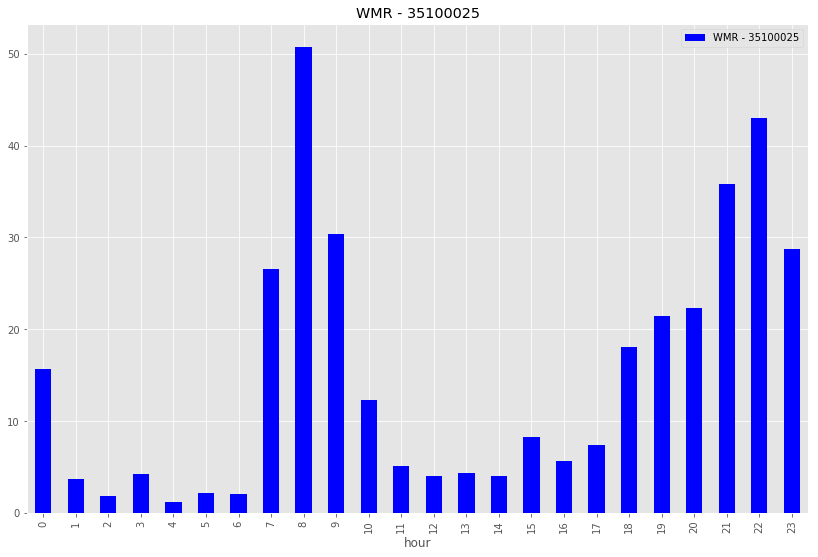

In [277]:
plot_bar_single(water_meter_data[0], 'df_by_hour_workdays', 'blue')

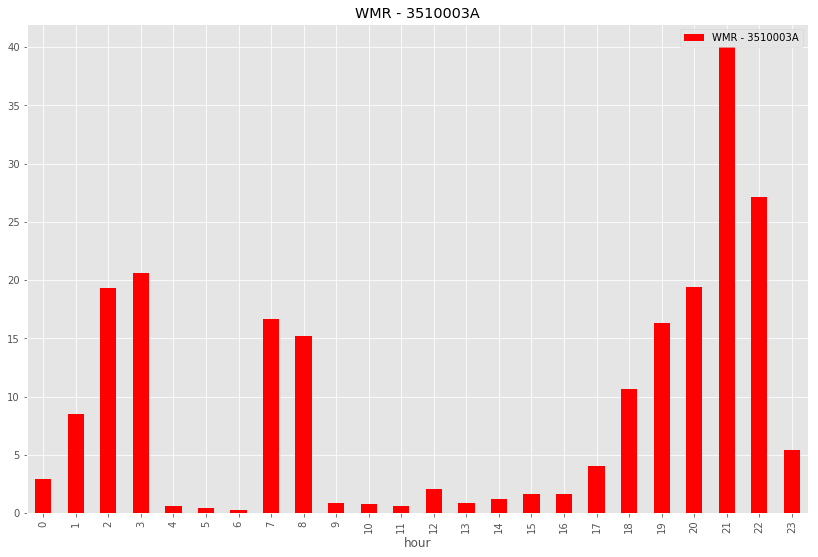

In [278]:
plot_bar_single(water_meter_data[1], 'df_by_hour_workdays', 'red')

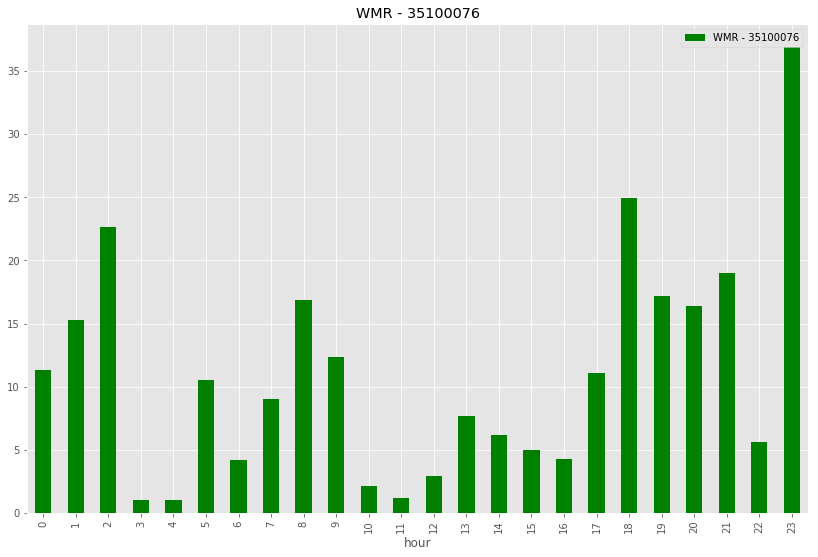

In [279]:
plot_bar_single(water_meter_data[2], 'df_by_hour_workdays', 'green')

In [280]:
ch_data = water_meter_data[2]['data']
ch_data = ch_data[ch_data['weekday_nb'] < 5]
ch_data = ch_data[ch_data['hour'] >= 0]
ch_data = ch_data[ch_data['hour'] < 3]

ch_data = ch_data[ch_data['consumption'] > 1]

ch_data

,data,consumption,year,month,day,hour,minute,weekday_nb,weekday
date,,,,,,,,,
2017-04-03 02:20:18,668,29.0,2017,4,3,2,20,0,Monday
2017-04-06 01:20:40,1250,4.0,2017,4,6,1,20,3,Thursday
2017-04-07 00:20:47,1464,31.0,2017,4,7,0,20,4,Friday
2017-04-10 00:21:09,2024,34.0,2017,4,10,0,21,0,Monday
2017-04-11 02:21:17,2155,40.0,2017,4,11,2,21,1,Tuesday
2017-04-13 01:21:31,2562,103.0,2017,4,13,1,21,3,Thursday
2017-04-20 00:22:22,3776,3.0,2017,4,20,0,22,3,Thursday
2017-04-21 02:22:30,3927,44.0,2017,4,21,2,22,4,Friday


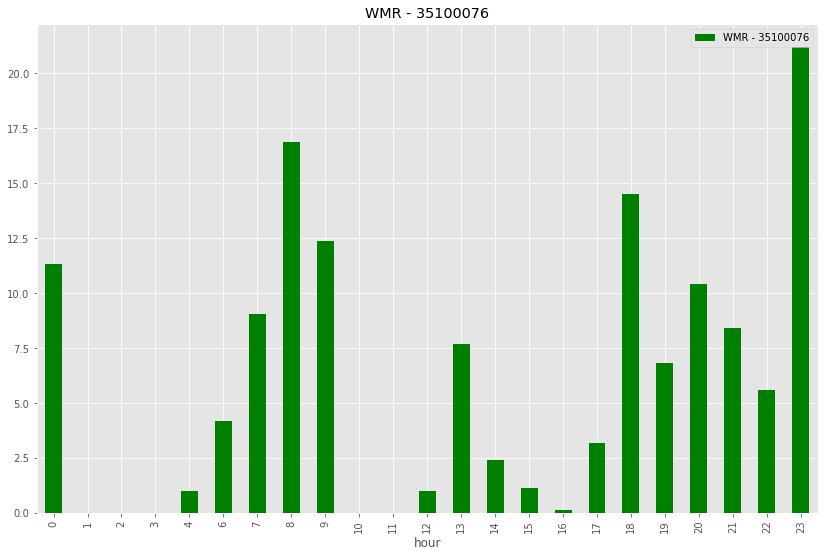

In [427]:
def manage_hourly_data(result_label, map_df=lambda x: x):
    i = 0
    for wm in water_meter_data:
        df = wm['data']
        df = map_df(df)
        df_by_hour = df.groupby(['month', 'day', 'hour'], as_index=False)
        df_by_hour = df_by_hour['consumption'].sum()
        means_by_hours = df_by_hour.groupby(['hour'])['consumption'].mean()
        df_by_hour['mean_val'] = df_by_hour.apply(lambda row: means_by_hours[row['hour']] , axis=1)
        df_by_hour['deviation']= abs(df_by_hour['mean_val'] - df_by_hour['consumption'])
        df_by_hour['deviation_times_diff'] = df_by_hour['deviation'] / df_by_hour['mean_val']
        df_by_hour = df_by_hour[df_by_hour['deviation_times_diff'] < 2]
        i+=1
        df_by_hour = df_by_hour.groupby(['hour'])['consumption'].mean()
        wm[result_label] = df_by_hour
    
manage_hourly_data('df_by_hour_workdays', lambda df: df[df['weekday_nb'] < 5])
water_meter_data[2]['df_by_hour_workdays']
plot_bar_single(water_meter_data[2],'df_by_hour_workdays', 'green')

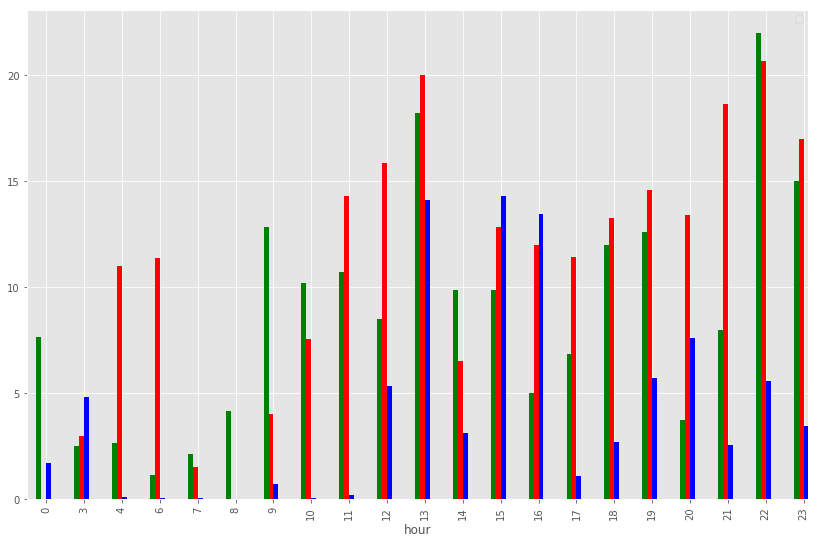

In [282]:
manage_hourly_data('df_by_hour_weekends', lambda df: df[df['weekday_nb'] >= 5])
plot_bar('df_by_hour_weekends')

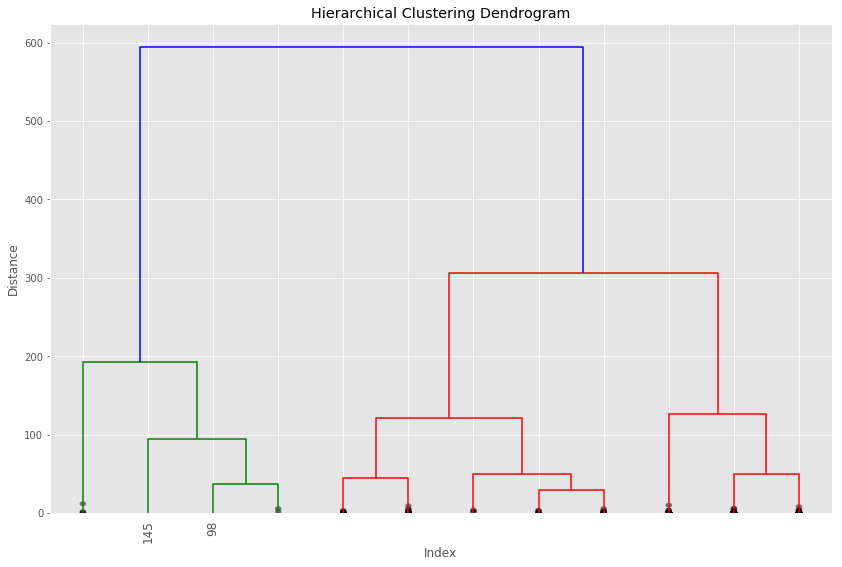

In [283]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

data = water_meter_data[0]['data'][['consumption']].copy()
Z = linkage(data[data['consumption'] > 0.01][:1000], 'ward')
plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',   # show only the last p merged clusters
    p=12,                    # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,    # to get a distribution impression in truncated branches
)
plt.show()

In [415]:
from sklearn.cluster import KMeans

def do_kmeans(time_series, n_clusters=3):
    values = time_series.values
    values_reshape_for_kmeans = values.reshape(-1, 1)
    kmeans_obj = KMeans(n_clusters=n_clusters,random_state=0, algorithm='full')
    kmeans_obj = kmeans_obj.fit(values_reshape_for_kmeans)
    return kmeans_obj

In [418]:
df = water_meter_data[0]['data']
kmeans = do_kmeans(df['consumption'])

print(kmeans.cluster_centers_)
print(kmeans.predict(138))

[[   0.59118454]
 [ 139.5146875 ]
 [  24.15025688]]
[1]


In [509]:
test_arr = [1.2, 2.2, 2.3, 1.1, 5, 6, 3]
test = pd.DataFrame(test_arr, columns=['data'])
kmeans_test = do_kmeans(test['data'])

print(kmeans_test.cluster_centers_)
print(kmeans_test.predict(3))

[[ 5.5 ]
 [ 2.5 ]
 [ 1.15]]
[1]


In [420]:
from math import ceil, floor

result_arr = []
range_start = 3
range_end = 20

def int_round_str(num):
    return str(int(num))

for k in range(range_start, range_end):
    cpy_df = df.copy()
    cluster = do_kmeans(cpy_df['consumption'], k)
    mean_values = cluster.cluster_centers_.flatten().tolist()
    mean_values = map(int_round_str, mean_values)
    result_arr.append({"k": k, "mean_values": ', '.join(mean_values)})
    
for value in result_arr:
    print(str(value['k']) + ": " + str(value['mean_values']))

3: 0, 139, 24
4: 0, 159, 14, 56
5: 0, 159, 25, 9, 67
6: 0, 97, 49, 21, 167, 7
7: 0, 97, 27, 14, 167, 53, 6
8: 0, 103, 11, 35, 167, 61, 21, 5
9: 0, 167, 46, 17, 4, 104, 28, 69, 10
10: 0, 104, 28, 4, 164, 69, 18, 46, 227, 10
11: 0, 104, 22, 160, 9, 47, 4, 32, 69, 200, 15
12: 0, 174, 37, 16, 71, 9, 4, 149, 51, 102, 25, 227
13: 0, 69, 153, 15, 6, 32, 104, 23, 176, 10, 3, 227, 47
14: 0, 102, 10, 71, 174, 6, 29, 53, 227, 21, 149, 40, 15, 2
15: 0, 71, 10, 176, 29, 3, 120, 22, 227, 41, 97, 15, 153, 6, 54
16: 0, 118, 40, 9, 153, 70, 23, 2, 227, 95, 13, 176, 53, 5, 17, 30
17: 18, 0, 153, 53, 7, 227, 95, 40, 5, 14, 31, 70, 118, 176, 2, 10, 24
18: 0, 120, 25, 7, 70, 153, 54, 16, 96, 2, 227, 32, 13, 176, 4, 9, 42, 20
19: 0, 78, 7, 151, 32, 19, 4, 53, 120, 187, 97, 24, 227, 66, 2, 14, 42, 10, 171


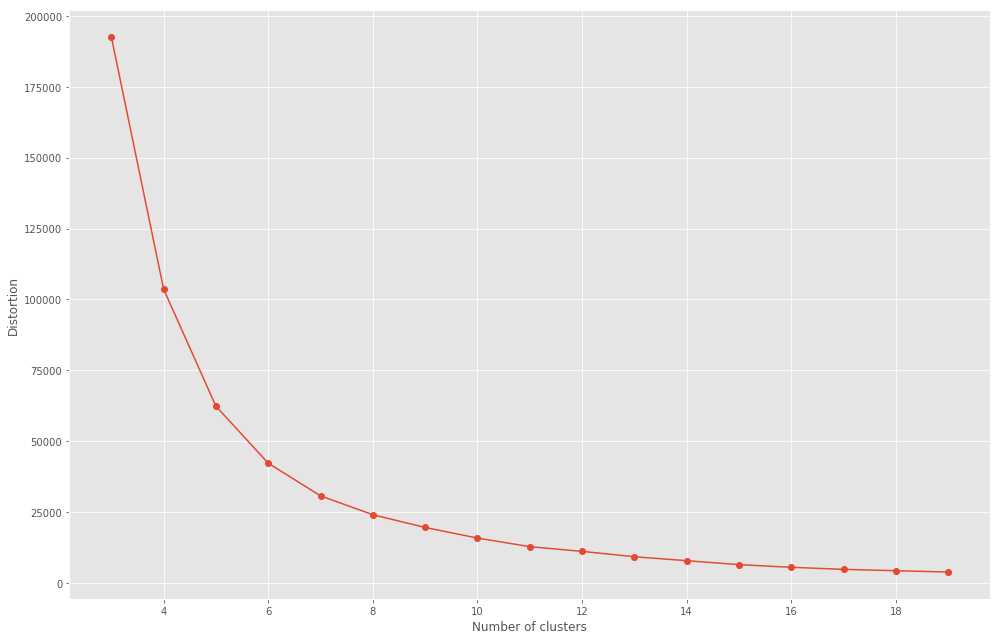

In [291]:
range_start = 3
range_end = 20

distortions = []
for k in range(range_start, range_end):
    cpy_df = df.copy()
    cluster = do_kmeans(cpy_df['consumption'], k)
    distortions.append(cluster.inertia_)
    
    
plt.plot(range(range_start, range_end), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [292]:
kmeans = do_kmeans(df['consumption'], 11)

clt_idx_list = list(map(lambda num: int(num), kmeans.cluster_centers_.flatten().tolist()))
i = 0
for c in clt_idx_list:
    print(str(i) + ": " + str(c))
    i += 1

0: 0
1: 104
2: 22
3: 160
4: 9
5: 47
6: 4
7: 32
8: 69
9: 200
10: 15


In [293]:
cluster_idx_fn = lambda row: kmeans.predict(row['consumption'])[0]
water_meter_data[0]['data']['cluster_idx'] = water_meter_data[0]['data'].apply(cluster_idx_fn, axis=1)
water_meter_data[0]['data'].head(10)

,data,consumption,year,month,day,hour,minute,weekday_nb,weekday,cluster_idx
date,,,,,,,,,,
2017-02-17 18:41:09,17.92,0.00,2017,2,17,18,41,4,Friday,0
2017-02-17 18:46:11,23.48,5.56,2017,2,17,18,46,4,Friday,6
2017-02-17 18:51:13,23.48,0.00,2017,2,17,18,51,4,Friday,0
2017-02-17 18:56:15,23.48,0.00,2017,2,17,18,56,4,Friday,0
2017-02-17 19:01:17,23.48,0.00,2017,2,17,19,1,4,Friday,0
2017-02-17 19:06:20,35.83,12.35,2017,2,17,19,6,4,Friday,10
2017-02-17 19:11:22,35.84,0.01,2017,2,17,19,11,4,Friday,0
2017-02-17 19:16:24,40.93,5.09,2017,2,17,19,16,4,Friday,6
2017-02-17 19:21:26,40.93,0.00,2017,2,17,19,21,4,Friday,0


In [294]:
event_dict={0: 'NO_USAGE', 
            1: 'BATH_SHOWER', 
            3: 'BATH_SHOWER', 
            5: 'BATH_SHOWER', 
            7: 'BATH_SHOWER', 
            8: 'BATH_SHOWER', 
            9: 'BATH_SHOWER', 
            6: 'SINK_USE', 
            4: 'WC', 
            10: 'WC'}

def cluster_name_fn(row):
    if row['cluster_idx'] in event_dict:
        return event_dict[row['cluster_idx']]
    return 'ACTIVITY_NOT_SPECIFIED'


water_meter_data[0]['data']['activity'] = water_meter_data[0]['data'].apply(cluster_name_fn, axis=1)
water_meter_data[0]['data'].head(4)

,data,consumption,year,month,day,hour,minute,weekday_nb,weekday,cluster_idx,activity
date,,,,,,,,,,,
2017-02-17 18:41:09,17.92,0.00,2017,2,17,18,41,4,Friday,0,NO_USAGE
2017-02-17 18:46:11,23.48,5.56,2017,2,17,18,46,4,Friday,6,SINK_USE
2017-02-17 18:51:13,23.48,0.00,2017,2,17,18,51,4,Friday,0,NO_USAGE
2017-02-17 18:56:15,23.48,0.00,2017,2,17,18,56,4,Friday,0,NO_USAGE


In [295]:
water_meter_data[0]['data'][water_meter_data[0]['data']['activity'] == 'ACTIVITY_NOT_SPECIFIED']

,data,consumption,year,month,day,hour,minute,weekday_nb,weekday,cluster_idx,activity
date,,,,,,,,,,,
2017-02-17 23:23:10,143.05,27.25,2017,2,17,23,23,4,Friday,2,ACTIVITY_NOT_SPECIFIED
2017-02-17 23:28:13,164.85,21.80,2017,2,17,23,28,4,Friday,2,ACTIVITY_NOT_SPECIFIED
2017-02-18 00:48:47,197.21,20.70,2017,2,18,0,48,5,Saturday,2,ACTIVITY_NOT_SPECIFIED
2017-02-18 09:52:40,255.99,23.28,2017,2,18,9,52,5,Saturday,2,ACTIVITY_NOT_SPECIFIED
2017-02-18 09:57:43,287.89,31.90,2017,2,18,9,57,5,Saturday,7,ACTIVITY_NOT_SPECIFIED
2017-02-18 10:07:47,338.24,36.29,2017,2,18,10,7,5,Saturday,7,ACTIVITY_NOT_SPECIFIED
2017-02-18 11:28:22,518.61,24.12,2017,2,18,11,28,5,Saturday,2,ACTIVITY_NOT_SPECIFIED
2017-02-19 10:36:15,640.85,25.37,2017,2,19,10,36,6,Sunday,2,ACTIVITY_NOT_SPECIFIED
2017-02-19 11:58:52,1161.34,38.78,2017,2,19,11,58,6,Sunday,7,ACTIVITY_NOT_SPECIFIED


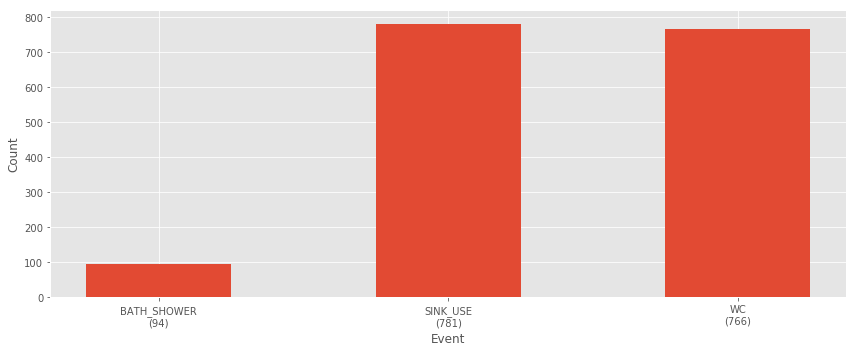

In [42]:
events = ['BATH_SHOWER', 'SINK_USE', 'WC']
rcParams['figure.figsize'] = 12, 5

def get_x_label(event, cnt):
    return event + '\n' + '(' + str(cnt) + ')'

def print_event_counts(df):
    result = {}
    for event in events:
        cnt = df[df['activity'] == event]['consumption'].count()
        result[get_x_label(event, cnt)] = cnt
    y = list(result.values())
    x = list(result.keys())
    
    fig, ax = plt.subplots()
    ax.bar([1, 2, 3], y, width=0.5, tick_label=x)
    plt.xlabel('Event')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

print_event_counts(water_meter_data[0]['data'])

In [296]:
df = water_meter_data[0]['data']
events = ['BATH_SHOWER', 'SINK_USE', 'WC']

def find_avg_event_count(df, period=None, map_df=lambda x, y: x):
    df = df[df['activity'].isin(events)].copy()
    df = map_df(df, period)
    df_by_hour = df.groupby(['month', 'day', 'activity']).size()
    df_by_hour = df_by_hour.reset_index(name='size')
    df_by_hour = df_by_hour.groupby('activity')['size'].mean().reset_index(name='mean')
    df_by_hour['mean'] = df_by_hour.apply(lambda row: ceil(row['mean']), axis=1)
    return df_by_hour

res = find_avg_event_count(df)
res

,activity,mean
0,BATH_SHOWER,3
1,SINK_USE,13
2,WC,13


In [371]:
from collections import OrderedDict

periods = OrderedDict()
periods['NIGHT'] = { 'start': 0, 'end': 6, 'activity': 'SLEEP', 'color': 'black' }
periods['MORNING'] = { 'start': 7, 'end': 10, 'activity': 'HOME', 'color': 'orange' }
periods['DAY'] = { 'start': 11, 'end': 17, 'activity': 'WORK', 'color': 'yellow' }
periods['EVENING'] = { 'start': 18, 'end': 23, 'activity': 'HOME', 'color': 'orange' }

,WC,SINK_USE,BATH_SHOWER,start,end,activity,color
period,,,,,,,
NIGHT,2,2,1,0,6,SLEEP,black
MORNING,5,4,2,6,10,HOME,orange
DAY,3,3,1,10,17,WORK,yellow
EVENING,6,7,2,17,23,HOME,orange


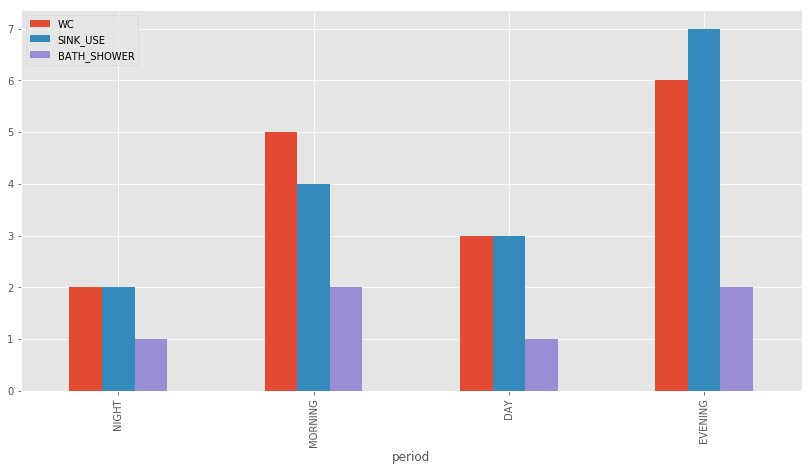

In [400]:
columns = ['WC', 'SINK_USE', 'BATH_SHOWER']
res = []

def filter_by_period(data_df, period_label, start, end):
    data_df = data_df[data_df[period_label] >= start]
    data_df = data_df[data_df[period_label] <= end]
    return data_df

def filter_by_hour(data_df, start, end): 
    return filter_by_period(data_df, 'hour', start, end)

def filter_by_day(data_df, start, end): 
    return filter_by_period(data_df, 'weekday_nb', start, end)

def get_filter_by_workdays_fn(data_df, period):
    data_df = filter_by_day(data_df, 0, 4)
    data_df = filter_by_hour(data_df, period['start'], period['end'])
    return data_df

def find_period_events(period, result_arr=[]):
    event_df = find_avg_event_count(df, period, get_filter_by_workdays_fn)
    for column in columns: 
        value = 0
        if column in event_df['activity'].values.tolist():
            value = event_df[event_df['activity'] == column].get('mean').values[0]
        result_arr.append(value)
    result_arr.append(period['start'])
    result_arr.append(period['end'])
    result_arr.append(period['activity'])
    result_arr.append(period['color'])
    return result_arr
    
for period in periods:
    res.append(find_period_events(periods[period], [period]))


pd_columns = ['period'] + columns + ['start', 'end', 'activity', 'color']
pd_columns
pattern_df = pd.DataFrame.from_records(res, index='period', columns=pd_columns)
pattern_df[columns].plot(kind='bar')
pattern_df
    

In [401]:
pattern_df.index.values.tolist()
pers = pattern_df.index.values.tolist()

for p in pers:
    print(pattern_df[pattern_df.index == p]['start'].values[0])
    print(pattern_df[pattern_df.index == p]['end'])

0
period
NIGHT    6
Name: end, dtype: int64
6
period
MORNING    10
Name: end, dtype: int64
10
period
DAY    17
Name: end, dtype: int64
17
period
EVENING    23
Name: end, dtype: int64


In [402]:
pattern_df
column_c={'WC':'brown', 'SINK_USE': 'green', 'BATH_SHOWER':'m'}


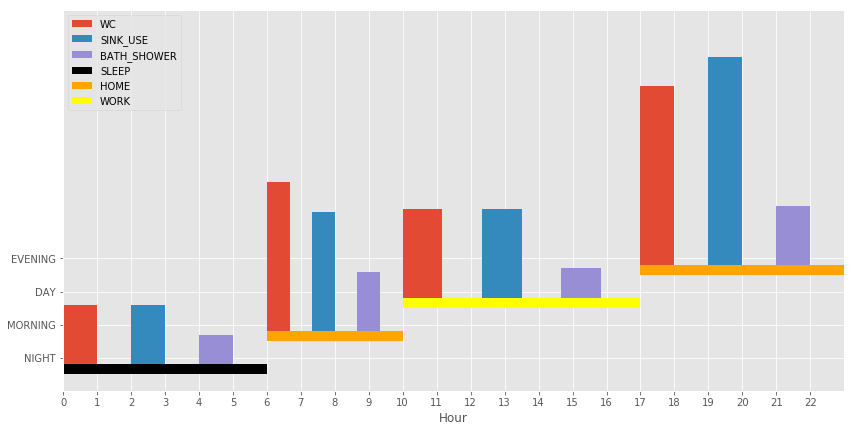

In [405]:
pattern_df
column_c={'WC':'#E24A33', 'SINK_USE': '#348ABD', 'BATH_SHOWER':'#988ED5'}

fig, ax = plt.subplots(figsize=(14,7))

x = 10
y_ticks = []
y_ticklabels = []
used_labels = []

def get_first(df):
    return df.values[0]

def do_bar(ax, begin, length, color, label):
    if label not in used_labels:
        used_labels.append(label)
        return ax.broken_barh(begin, length, facecolors=color, label=label)
    else: 
        return ax.broken_barh(begin, length, facecolors=color)

for p in pattern_df.index.values.tolist():
    p_df = pattern_df[pattern_df.index == p]
    start = get_first(p_df['start'])
    end = get_first(p_df['end'])
    label = get_first(p_df['activity'])
    e = end-start
    w = e / len(columns)/2
    begin = start
    for c in columns:
        value = get_first(p_df[p_df.index == p][c])
        do_bar(ax, [(begin, w)], (x + 3, 9 * value), column_c[c], c)
        begin += w*2
    color = get_first(p_df['color'])
    
    do_bar(ax, [(start, end-start)], (x, 3), color, label)
    y_ticks.append(x+5)
    y_ticklabels.append(p)
    x+=10

ax.set_ylim(5, 120)
ax.set_xlim(0, 23)
ax.set_xticks(range(0, 23))
ax.set_xlabel('Hour')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)
ax.grid(True)
ax.legend(loc='upper left')


plt.show()

In [678]:
month = 4
d_start = 3
d_end = 7

rcParams['figure.figsize'] = 14, 4

data_df = water_meter_data[0]['data']
data_df = data_df[data_df['month'] == month]
data_df = data_df[data_df['day'] >= d_start]
data_df = data_df[data_df['day'] <= d_end]

by_day_activities = None

hours = data_df['hour'].unique().tolist()
days = data_df['day'].unique().tolist()


res_arr_cols = ['hour'] + columns

day_pd_arr = []
def create_day_pd(day_arr):
    return pd.DataFrame.from_records(day_arr, index='hour', columns=res_arr_cols)
    

for day in days:
    result = []
    for hour in hours:
        res_arr = []
        res_arr.append(hour)
        by_hour_df = data_df[data_df['day'] == day].copy()
        by_hour_df = by_hour_df[by_hour_df['hour'] == hour]
        by_hour_df = by_hour_df[by_hour_df['activity'].isin(columns)]
        by_hour_df = by_hour_df.groupby('activity').size()
        by_hour_df = by_hour_df.reset_index(name='count')
        for col in columns:
            if by_hour_df[by_hour_df['activity'] == col].size > 0:
                value = get_first(by_hour_df[by_hour_df['activity'] == col]['count'])
            else: value = 0
            res_arr.append(value)
        result.append(res_arr)
    day_pd_arr.append(create_day_pd(result))



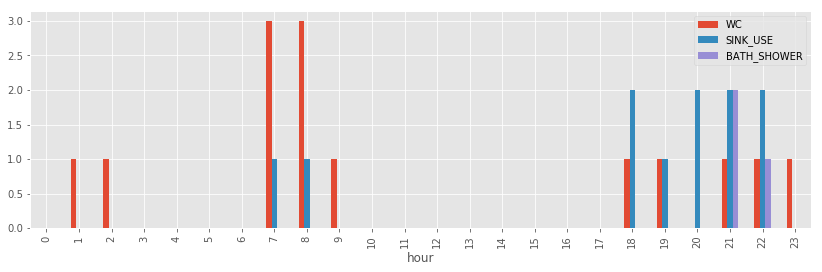

In [679]:
day_pd_arr[0].plot(kind='bar')

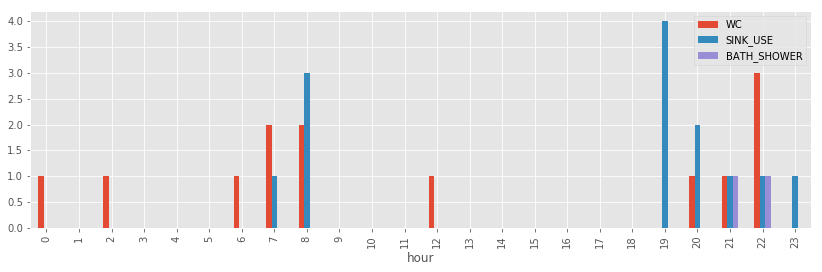

In [680]:
day_pd_arr[1].plot(kind='bar')

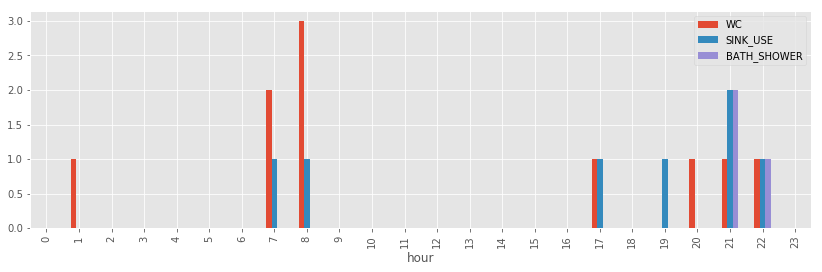

In [681]:
day_pd_arr[2].plot(kind='bar')

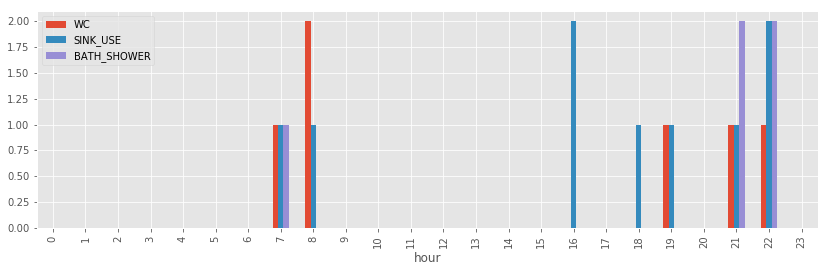

In [682]:
day_pd_arr[3].plot(kind='bar')

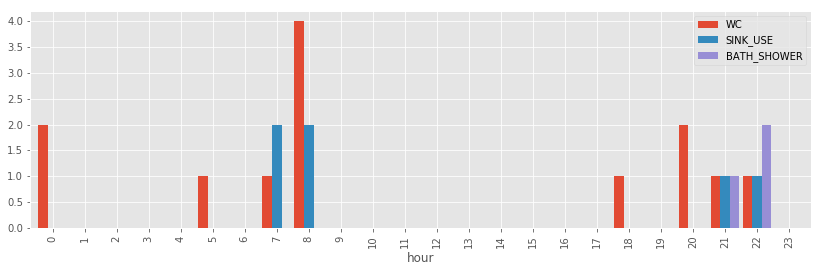

In [683]:
day_pd_arr[4].plot(kind='bar', width=0.9)